In [37]:
import pickle
import networkx as nx
import numpy as np

with open(r'graphs/H64f1.pkl', 'rb') as f:
    test_graph = pickle.load(f)

# nx.draw(test_graph, with_labels=True)

for u, v in test_graph.edges():
    if 'weight' not in test_graph[u][v]:
        test_graph[u][v]['weight'] = 1

        import matplotlib.pyplot as plt
import numpy as np

def draw_partitioned_graph(graph, num_partitions, assignment, title="Graph Partitioning"):
    """
    Draw a graph with nodes positioned in pizza slice regions based on their partition
    """
    if len(graph.nodes()) > 64:
        print(f"Graph too large to visualize effectively ({len(graph.nodes())} nodes). Skipping visualization.")
        return
        
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    colors = plt.cm.Set3(np.linspace(0, 1, num_partitions))
    
    # Calculate positions for nodes in pizza slices
    pos = {}
    partition_counts = {}
    partition_positions = {}
    
    # Count nodes in each partition and initialize position counters
    for node_idx, node in enumerate(graph.nodes()):
        partition = assignment[node] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[node_idx]
        if partition not in partition_counts:
            partition_counts[partition] = 0
            partition_positions[partition] = 0
        partition_counts[partition] += 1
    
    # Position nodes in pizza slices
    for node_idx, node in enumerate(graph.nodes()):
        partition = assignment[node] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[node_idx]
        
        # Calculate angle for this partition (pizza slice)
        slice_angle_start = (partition / num_partitions) * 2 * np.pi
        slice_angle_end = ((partition + 1) / num_partitions) * 2 * np.pi
        slice_angle_width = slice_angle_end - slice_angle_start
        
        # Position within the slice
        nodes_in_partition = partition_counts[partition]
        node_index_in_partition = partition_positions[partition]
        partition_positions[partition] += 1
        
        # Distribute nodes within the slice
        if nodes_in_partition == 1:
            angle_offset = slice_angle_width / 2
        else:
            angle_offset = (node_index_in_partition / (nodes_in_partition - 1)) * slice_angle_width * 0.8
            angle_offset += slice_angle_width * 0.1  # Add some margin
        
        angle = slice_angle_start + angle_offset
        
        # Vary the radius slightly to avoid overlapping
        radius = 0.7 + 0.2 * (node_index_in_partition % 3) / 3
        
        x = radius * np.cos(angle)
        y = radius * np.sin(angle)
        pos[node] = (x, y)
    
    # Draw partition boundaries (pizza slice lines)
    for partition in range(num_partitions):
        angle = (partition / num_partitions) * 2 * np.pi
        x_line = [0, np.cos(angle)]
        y_line = [0, np.sin(angle)]
        ax.plot(x_line, y_line, 'k--', alpha=0.3, linewidth=1)
    
    # Draw edges
    edge_colors = []
    for u, v in graph.edges():
        u_partition = assignment[u] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[list(graph.nodes()).index(u)]
        v_partition = assignment[v] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[list(graph.nodes()).index(v)]
        
        if u_partition == v_partition:
            edge_colors.append('gray')  # Internal edges
        else:
            edge_colors.append('red')   # Cut edges
    
    nx.draw_networkx_edges(graph, pos, edge_color=edge_colors, alpha=0.6, ax=ax)
    
    # Draw nodes colored by partition
    for partition in range(num_partitions):
        nodes_in_partition = []
        for node_idx, node in enumerate(graph.nodes()):
            node_partition = assignment[node] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[node_idx]
            if node_partition == partition:
                nodes_in_partition.append(node)
        
        if nodes_in_partition:
            nx.draw_networkx_nodes(graph, pos, nodelist=nodes_in_partition, 
                                 node_color=[colors[partition]], 
                                 node_size=500, alpha=0.8, ax=ax)
    
    # Draw node labels
    nx.draw_networkx_labels(graph, pos, font_size=8, font_weight='bold', ax=ax)
    
    # Draw edge weights if they exist
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    if edge_labels:
        nx.draw_networkx_edge_labels(graph, pos, edge_labels, font_size=6, ax=ax)
    
    # Add partition labels
    for partition in range(num_partitions):
        angle = (partition / num_partitions) * 2 * np.pi + (np.pi / num_partitions)
        label_x = 1.1 * np.cos(angle)
        label_y = 1.1 * np.sin(angle)
        ax.text(label_x, label_y, f'P{partition}', 
                fontsize=10, fontweight='bold', 
                ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=colors[partition], alpha=0.7))
    
    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('off')
    
    # Add legend
    cut_edges = sum(1 for u, v in graph.edges() 
                   if (assignment[u] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[list(graph.nodes()).index(u)]) != 
                      (assignment[v] if isinstance(assignment, (dict, np.ndarray)) and len(assignment) > max(graph.nodes()) else assignment[list(graph.nodes()).index(v)]))
    total_edges = len(graph.edges())
    
    # Calculate cut size properly
    try:
        cut_size = calculate_cut_size(graph, assignment)
        ax.text(0, -1.4, f'Cut edges: {cut_edges}/{total_edges} (Cut size: {cut_size})', 
                ha='center', fontsize=10, fontweight='bold')
    except:
        ax.text(0, -1.4, f'Cut edges: {cut_edges}/{total_edges}', 
                ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

print("Graph visualization function ready!")

Graph visualization function ready!


In [38]:
# Create a test graph and network
def create_test_example(n_nodes=12, edge_probability=0.3, num_partitions=2, max_weight=4, seed=42):
    """Create a test case using Erdős-Rényi random graph"""

    G = nx.erdos_renyi_graph(n_nodes, edge_probability, seed=seed)
    while not nx.is_connected(G):
        seed += 1
        G = nx.erdos_renyi_graph(n_nodes, edge_probability, seed=seed)

    
    # Add random weights to edges
    np.random.seed(seed)
    for u, v in G.edges():
        weight = np.random.randint(1, max_weight)  # Random weights between 1 and 4
        G[u][v]['weight'] = weight
    # Create quantum network with 3 partitions

    return G, qpu_sizes

# Create test case
n_nodes = test_graph.number_of_nodes()  # Adjusted for larger graph

print("N nodes:", n_nodes)
# n_nodes = 64

# test_graph, qpu_sizes = create_test_example(n_nodes=n_nodes, edge_probability=0.1, num_partitions=16, max_weight=4, seed=42)


qpu_size = (32,)

def find_max_size(graph):
    """Find the maximum partition size based on the graph size"""
    # For simplicity, we set max_size to the number of nodes in the graph
    return len(graph.nodes) + 2*len(graph.edges)

max_size = find_max_size(test_graph)

print(max_size)

num_partitions = max_size // qpu_size[0]

print(num_partitions)

qpu_sizes = { i : qpu_size[0] for i in range(num_partitions) }

print("QPU sizes:", qpu_sizes)


N nodes: 64
256
8
QPU sizes: {0: 32, 1: 32, 2: 32, 3: 32, 4: 32, 5: 32, 6: 32, 7: 32}


In [ ]:
import numpy as np

from disqco.graphs.quantum_network import QuantumNetwork
from disqco.parti.FM.FM_methods_nx import (
    set_initial_partition_assignment,
    find_spaces,
    find_spaces_with_ancillae,
    find_all_gains,
    fill_buckets,
    find_action,
    lock_node,
    take_action_and_update,
)
from disqco.parti.fgp.fgp_roee import calculate_W_matrix, calculate_W_matrix_cols, calculate_D_from_W

def fm_algorithm(graph: nx.Graph, qpu_sizes: dict, max_iterations=10, move_limit=None, total_graph=None, global_assignment=None, ancilla=False):
    """
    Main FM algorithm loop
    """
    num_partitions = len(qpu_sizes)
    if move_limit is None:
        move_limit = len(graph.nodes())
    else:
        move_limit = min(move_limit, len(graph.nodes()))
    
    # Initialize partition assignment
    if global_assignment is None:
        assignment = set_initial_partition_assignment(graph, qpu_sizes, method='round_robin')
    else:
        assignment = global_assignment

    if total_graph is not None:
        W = calculate_W_matrix(total_graph)
    else:
        W = calculate_W_matrix(graph)

    print(f"W matrix:\n{W}")
    
    # Max gain is the maximum weighted degree of any node in the graph
    max_weighted_degree = 0
    for node in graph.nodes():
        weighted_degree = sum(graph[node][neighbor].get('weight', 1) for neighbor in graph.neighbors(node))
        max_weighted_degree = max(max_weighted_degree, weighted_degree)
    
    max_gain = int(max_weighted_degree)
    
    best_assignment = assignment.copy()
    best_cut = calculate_cut_size(graph, assignment)
    
    print(f"Initial cut size: {best_cut}")
    print(f"Max gain (max weighted degree): {max_gain}")
    
    cuts_from_all_passes = [best_cut]

    for iteration in range(max_iterations):
        print(f"\nIteration {iteration + 1}")
        
        # Initialize for this pass
        current_assignment = assignment.copy()
        locked = set()
        if ancilla:
            spaces = find_spaces_with_ancillae(assignment, qpu_sizes, graph)
        else:
            spaces = find_spaces(assignment, qpu_sizes, graph)

        print("Spaces available:", spaces)

        D = find_all_gains(current_assignment, num_partitions, qpu_sizes,W, graph, max_gain=max_gain)
        # Fill buckets with current gains

        buckets = fill_buckets(D, current_assignment,num_partitions, max_gain)

        
        # Track all moves and states during the pass
        moves_history = []
        states_history = [current_assignment.copy()]
        gains_history = []
        cumulative_gains = [0]
        
        # Main FM pass - continue until all nodes are locked
        move_count = 0
        while move_count < move_limit:
            # Find best valid action
            result = find_action(buckets, current_assignment, spaces, max_gain, random=True, ancilla=ancilla)
            
            if result[0] is None:  # No valid moves found
                break
                
            node, destination, gain = result
            if node is None:
                break
            source = current_assignment[node]
            
            # Skip if node is already locked
            if node in locked:
                continue
            # Record the move
            moves_history.append((node, source, destination, gain))
            gains_history.append(gain)
            
            # Make the move using corrected function
            current_assignment = take_action_and_update(
                graph, node, source, destination, 
                current_assignment, num_partitions, W, D, 
                buckets, max_gain, locked, spaces=spaces, ancillae=ancilla)

            print(f'Update spaces after moving node {node} from partition {source} to {destination}: {spaces}')
            
            lock_node(node, locked)
            
            # Record state and cumulative gain
            states_history.append(current_assignment.copy())
            cumulative_gains.append(cumulative_gains[-1] + gain)
            move_count += 1

        # Find the best state during this pass
        if cumulative_gains:
            best_gain_index = np.argmax(cumulative_gains)
            best_cumulative_gain = cumulative_gains[best_gain_index]
            best_state_in_pass = states_history[best_gain_index]
            
            print(f"  Pass complete. Total moves: {len(moves_history)}")
            print(f"  Cumulative gains: {cumulative_gains}")
            print(f"  Best state found at move {best_gain_index} with cumulative gain: {best_cumulative_gain}")
            
            if iteration % 1 == 0:
                # Roll back to the best state found during this pass
                current_assignment = best_state_in_pass
                # Check if this pass improved the overall solution
                current_cut = calculate_cut_size(graph, current_assignment)
                print(f"  Current cut after rollback: {current_cut}")

            else:
                # Skip the roll back, keep the current assignment
                current_cut = calculate_cut_size(graph, current_assignment)
                print(f"  Current cut without rollback: {current_cut}")
            cuts_from_all_passes.append(current_cut)
            if current_cut < best_cut:
                best_cut = current_cut
                best_assignment = current_assignment.copy()
                assignment = current_assignment.copy()
                print(f"  New best cut size: {best_cut}")

            
            
        
    return best_assignment, best_cut, cuts_from_all_passes

def recursive_fm_algorithm(graph: nx.Graph,  target_partitions: int, initial_assignment=None, max_iterations=10, move_limit=None, depth=0):
    """
    Recursive FM algorithm using sparse assignment approach
    
    Args:
        graph: NetworkX graph to partition
        target_partitions: Desired number of final partitions
        max_iterations: Max iterations for each FM call
        move_limit: Limit on moves per FM pass
        depth: Current recursion depth (for logging)
        global_assignment: Full assignment array for the original graph (sparse approach)
        partition_offset: Offset to add to partition IDs for this subgraph
    
    Returns:
        final_assignment: Full assignment array (only for root call)
        total_cut: Total cut size across all partitions
        partition_subgraphs: List of subgraphs for each partition
    """
    indent = "  " * depth
    print(f"{indent}Recursive FM: Processing graph with {len(graph.nodes())} nodes, target: {target_partitions} partitions")
    
    if initial_assignment is None:
        initial_assignment = set_initial_partition_assignment(graph, {0: len(graph.nodes())}, method='round_robin')
    
    active_partitions = set([p for p in initial_assignment if p >= 0])
    current_num_partitions = len(active_partitions)

    print("Current num partitions:", current_num_partitions)
    print("Target partitions:", target_partitions)
    if current_num_partitions >= target_partitions:
        return initial_assignment, calculate_cut_size(graph, initial_assignment), [graph.subgraph([node for i, node in enumerate(graph.nodes()) if initial_assignment[i] == p]) for p in active_partitions]
    
    current_assignment = initial_assignment.copy()


    print(f"{indent} Current assignment before processing partitions: {current_assignment}")
    for i, p in enumerate(active_partitions):
        print(f"{indent}Processing partition {p}")
        subgraph_nodes = [node for i, node in enumerate(graph.nodes()) if initial_assignment[i] == p]
        subgraph = graph.copy()

        for node in graph.nodes():
            if node not in subgraph_nodes:
                subgraph.remove_node(node)
        


        print(f"{indent} Subgraph for partition {p} has {len(subgraph.nodes())} nodes and {len(subgraph.edges())} edges")
        sub_qpu_sizes = {p+i: len(subgraph.nodes()) // 2 + len(subgraph.nodes()) % 2 + 1, p+i+1: len(subgraph.nodes()) // 2 + 1}
        print(f"{indent} Subgraph QPU sizes: {sub_qpu_sizes}")
        # Recursively bisect the subgraph
        print(len(graph.nodes()), len(subgraph.nodes()))

        current_assignment = set_sparse_assignment(subgraph, graph, current_assignment, sub_qpu_sizes)
        print("Current assignment after setting sparse:", current_assignment)



        assignment, cut, _ = fm_algorithm(subgraph, sub_qpu_sizes, max_iterations, move_limit, total_graph=graph, global_assignment=current_assignment)
        print(f"Optimized assignment for partition {p}: {assignment}")

    return recursive_fm_algorithm(graph, target_partitions, assignment, max_iterations, move_limit, depth + 1)

def set_sparse_assignment(subgraph: nx.Graph, full_graph: nx.Graph, global_assignment: np.ndarray, qpu_sizes: dict):

    qpus = list(qpu_sizes.keys())
    for i, node in enumerate(subgraph.nodes()):
        global_assignment[node] = qpus[i%len(qpus)]
    return global_assignment

def calculate_cut_size(graph: nx.Graph, assignment: np.ndarray):
    """Calculate the cut size of a partition"""
    cut_size = 0
    for u, v in graph.edges():
        if assignment[u] != assignment[v]:
            weight = graph[u][v].get('weight', 1)
            cut_size += weight
    return cut_size



In [40]:
# Test regular FM
import time


fm_assignment, fm_cut, fm_cuts_history = fm_algorithm(test_graph, qpu_sizes, max_iterations=10, move_limit=len(test_graph.nodes()),ancilla=True)
print("\n" + "=" * 60)
print("REGULAR FM RESULTS")
print("=" * 60)
print(f"FM cut size: {fm_cut}")
print(f"Partition sizes: {np.bincount(fm_assignment)}")

# target_partitions = len(qpu_sizes)
# start = time.time()

# recursive_assignment, recursive_cut, recursive_subgraphs = recursive_fm_algorithm(
#     test_graph, target_partitions, max_iterations=5, move_limit=len(test_graph.nodes()))

# end = time.time()

# print(f"Recursive FM Algorithm completed in {end - start:.2f} seconds.")
# print("FINAL RESULTS:")
# print(f"Final cut size: {recursive_cut}")



W matrix:
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Initial cut size: 72
Max gain (max weighted degree): 3

Iteration 1
Spaces available: {0: 4, 1: 4, 2: 2, 3: 2, 4: 2, 5: 3, 6: 4, 7: 3}
Updating ancilla spaces for move from 3 to 7 with neighbour in 7
Updating ancilla spaces for move from 3 to 7 with neighbour in 7
Updating ancilla spaces for move from 3 to 7 with neighbour in 7
Update spaces after moving node 59 from partition 3 to 7: {0: 4, 1: 4, 2: 2, 3: 3, 4: 2, 5: 3, 6: 4, 7: 5}
Updating ancilla spaces for move from 2 to 0 with neighbour in 0
Updating ancilla spaces for move from 2 to 0 with neighbour in 0
Updating ancilla spaces for move from 2 to 0 with neighbour in 6
Update spaces after moving node 2 from partition 2 to 0: {0: 4, 1: 4, 2: 4, 3: 3, 4: 2, 5: 3, 6: 4, 7: 5}
Updating ancilla spaces for move from 6 to 2 with neighbour in 2
Updating ancilla spaces for mov

VISUALIZATIONS
Initial partition visualization:
Capacities after initial assignment with ancillae: {np.int64(0): 28, np.int64(1): 28, np.int64(2): 30, np.int64(3): 30, np.int64(4): 30, np.int64(5): 29, np.int64(6): 28, np.int64(7): 29}


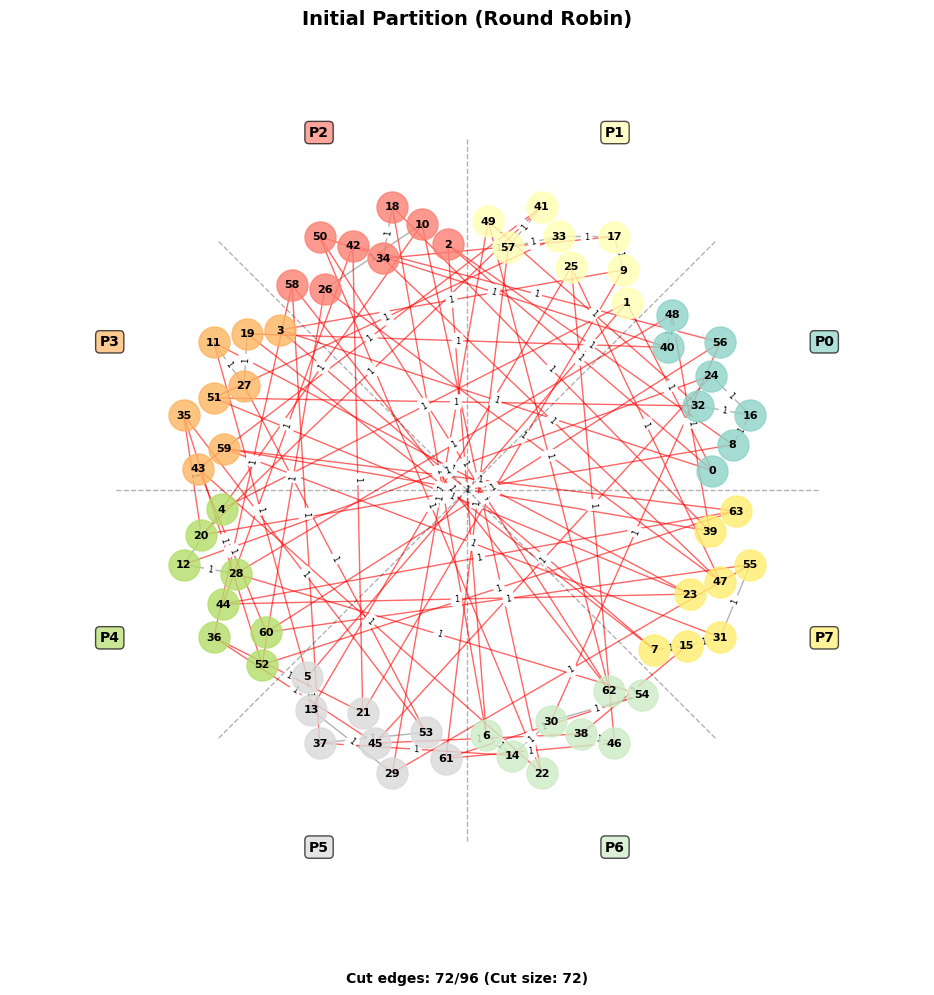


Recursive FM result:


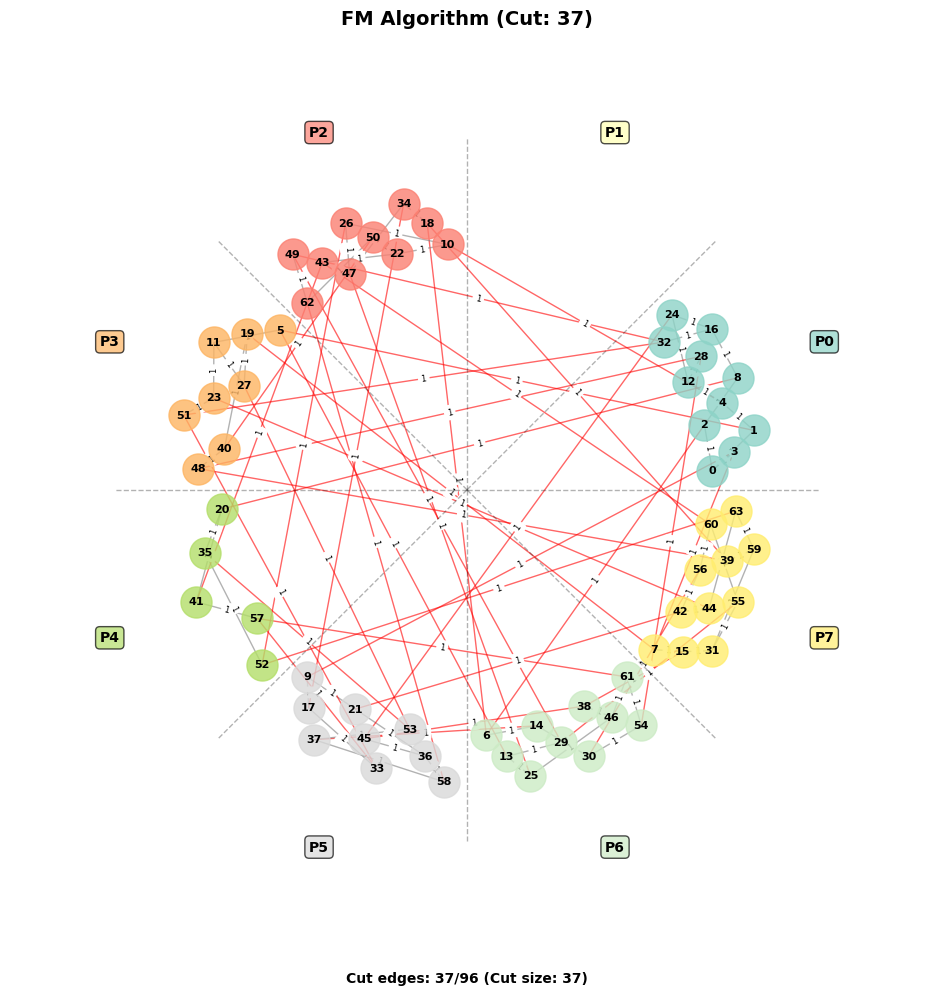

Capacities after FM with ancillae: {np.int64(0): 33, np.int64(3): 25, np.int64(6): 31, np.int64(7): 33, np.int64(5): 28, np.int64(2): 31, np.int64(4): 16}


In [41]:
def calculate_capacities(assignment, graph, ancilla=False):
    capacities = {}
    for part in assignment:
        if part not in capacities:
            capacities[part] = 0
        capacities[part] += 1
    if ancilla:
        for edge in graph.edges():
            u, v = edge
            if assignment[u] != assignment[v]:
                capacities[assignment[u]] += 1
                capacities[assignment[v]] += 1
            else:
                capacities[assignment[u]] += 1  # No increase for internal edges
    return capacities


# Visualize the results if graph is small enough
if len(test_graph.nodes()) <= 64:
    print("=" * 50)
    print("VISUALIZATIONS")
    print("=" * 50)
    
    # Visualize initial partition
    print("Initial partition visualization:")
    initial_assignment = set_initial_partition_assignment(test_graph, qpu_sizes, method='round_robin')

    capacities_initial = calculate_capacities(initial_assignment, test_graph, ancilla=True)

    print("Capacities after initial assignment with ancillae:", capacities_initial)
    
    draw_partitioned_graph(test_graph, num_partitions, initial_assignment, "Initial Partition (Round Robin)")

    # Visualize recursive FM result
    print("\nRecursive FM result:")

    draw_partitioned_graph(test_graph, num_partitions, fm_assignment, f"FM Algorithm (Cut: {fm_cut})")

    capacities_final = calculate_capacities(fm_assignment, test_graph, ancilla=True)

    print("Capacities after FM with ancillae:", capacities_final)


    



In [42]:
# Compare with nx spectral bisecction and Kernighan-Lin
import copy
from networkx.algorithms import community

def cut_nx_graph_max(
    G, qpu_max: int = 25, comms=None, return_comms=False, func="spectral",
    seed=None
):
    ### Inputs
    # - G nx.Graph to partition
    # - QPU_max - max number of vertex in subgraph set
    # - Comms - list of subgraphs as initial inputs (these can be further partions)
    # - return_comms - return the resulting subgraphs selected
    # - seed - random seed for spectral bisection
    # This function does not attempt to find an optimal cut
    # Just bisect the (sub)graphs until there are n segments
    # Spectral - use spectral bisection (eigenvalue partitioning)
    # Kernigham_lin  = min-weight random bisection
    #  spectral seems better but non-optimal
    G = copy.deepcopy(G)
    if func not in ["spectral", "kernighan_lin", "mitis"]:
        raise ValueError("invalid func flag")
    if comms is None:
        comms = [G]
    communities = sorted(
        comms, key=lambda x: len(x.nodes), reverse=True
    )

    if len(G.nodes) <= qpu_max or len(G.nodes) == 1:
        pass  # already done
    elif qpu_max < len(G.nodes) and len(G.nodes) >= 2:
        while len(communities[0].nodes) > 1 and not np.all(
            [len(k.nodes) <= qpu_max for k in communities]
        ):  # keep going while size of communites (|C|) --> n_qpu>=|C|>1
            k_prime = communities.pop(0)
            if func == "spectral":
                left, right = nx.spectral_bisection(k_prime, seed=seed)
            elif func == "kernighan_lin":
                left, right = community.kernighan_lin.kernighan_lin_bisection(
                    k_prime, max_iter=1_000_000
                )
            elif func == "mitis":
                raise NotImplementedError("not done yet sorry")

            communities.append(G.subgraph(left))
            communities.append(G.subgraph(right))
            communities = sorted(
                communities, key=lambda x: len(x.nodes), reverse=True
            )  # set with most nodes - bit of a heuristic choice imo

    else:
        raise ValueError(
            f"can not cut a {len(G.nodes)}-node graph into {qpu_max}-sized segments"
        )
    for device_i, comm in enumerate(communities):
        for node in comm:
            G.nodes[node]["QPU"] = device_i
            # Node is part of device i for devices in range 0..n
    return G, communities


In [43]:
start = time.time()
G, comms = cut_nx_graph_max(test_graph, qpu_max=max(list(qpu_sizes.values())), func="kernighan_lin", seed=42)
end = time.time()
print(f"Graph partitioning completed in {end - start:.2f} seconds.")

Graph partitioning completed in 0.00 seconds.



Partition sizes from NetworkX KL: [32, 32]

Cut size from NetworkX Kernighan-Lin: 18


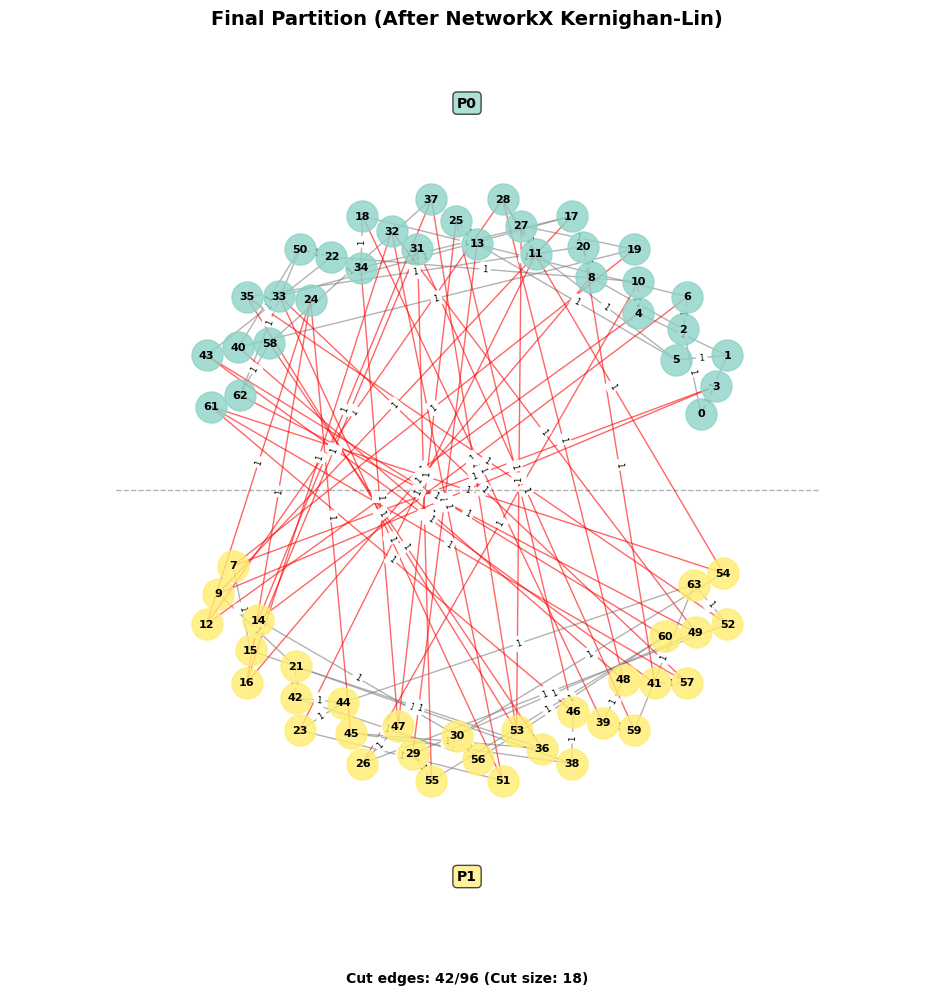

In [44]:
def calculate_cut_from_communities(graph, communities):
    cut = 0
    for comm in communities:
        for node in comm:
            for neighbor in graph.neighbors(node):
                if neighbor not in comm:
                    cut += 1
    return cut

def set_assignment_from_communities(graph, communities):
    assignment = [0] * len(graph.nodes())
    for i, comm in enumerate(communities):
        for node in comm:
            assignment[node] = i
    return assignment


assignment_KL = set_assignment_from_communities(test_graph, comms)

cut_KL = calculate_cut_size(test_graph, assignment_KL)
partition_counts = [len([n for n in assignment_KL if n == i]) for i in range(max(assignment_KL) + 1)]
print(f"\nPartition sizes from NetworkX KL: {partition_counts}")
print(f"\nCut size from NetworkX Kernighan-Lin: {cut_KL}")
draw_partitioned_graph(test_graph, max(assignment_KL)+1, assignment_KL, "Final Partition (After NetworkX Kernighan-Lin)")



In [45]:
from disqco.parti.fgp.fgp_roee import (
    run_initial_OEE
)
assignment = set_initial_partition_assignment(test_graph, list(qpu_sizes.values()), method='round_robin')
start_time = time.time()
refined_assignment, mapping = run_initial_OEE(test_graph, assignment, list(qpu_sizes.values()))

print('Cut from OEE:', calculate_cut_size(test_graph, refined_assignment))
print(f'Time taken: {time.time() - start_time:.2f} seconds')

partition_counts = [len([n for n in refined_assignment if n == i]) for i in range(num_partitions)]

print(f"\nPartition sizes from OEE: {partition_counts}")


Running OEE
Cut from OEE: 40
Time taken: 0.16 seconds

Partition sizes from OEE: [8, 8, 8, 8, 8, 8, 8, 8]


[1 3 1 1 3 3 1 6 4 1 5 3 0 2 5 6 0 1 2 3 4 1 5 0 0 2 5 3 6 2 7 7 0 0 2 4 1
 5 6 2 3 4 7 4 0 6 6 2 3 2 5 0 4 4 6 7 7 4 5 7 7 6 5 7]


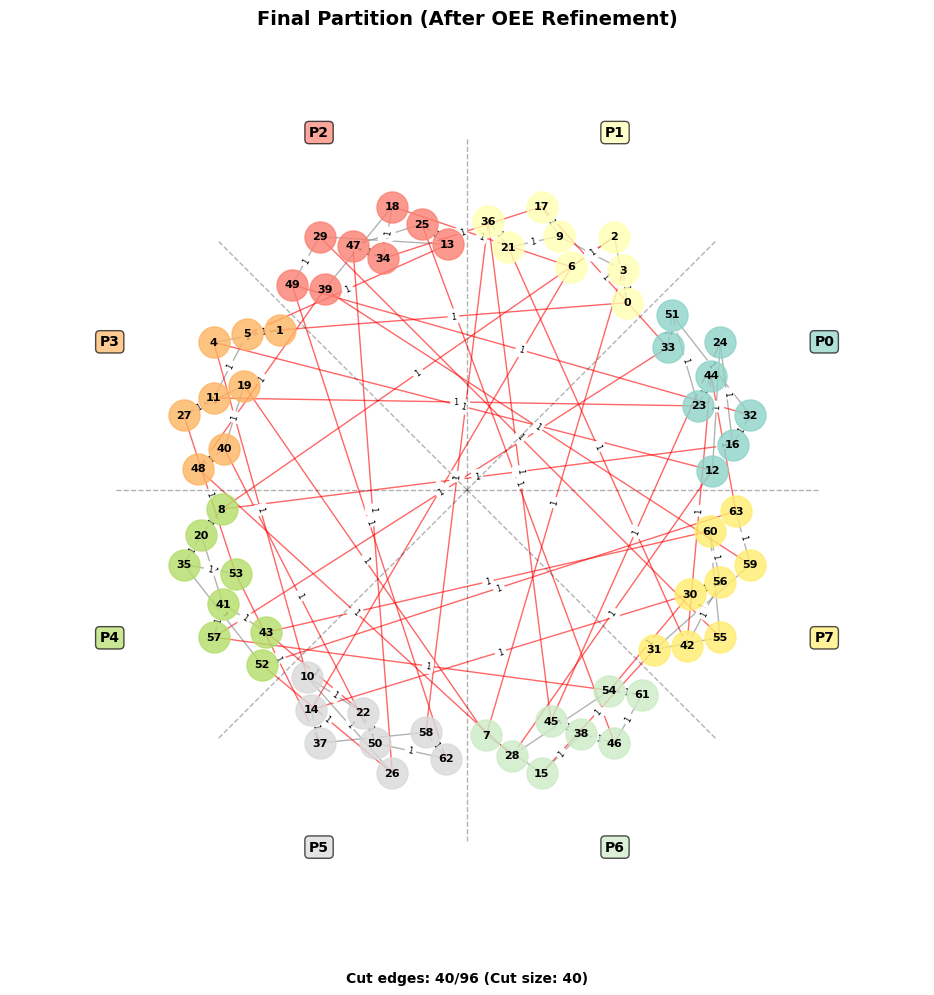

In [46]:
print(refined_assignment)

draw_partitioned_graph(test_graph, num_partitions, refined_assignment, "Final Partition (After OEE Refinement)")

Graph partitioning completed in 0.01 seconds.

Partition sizes from NetworkX spectral bisection: [32, 32]
2 2


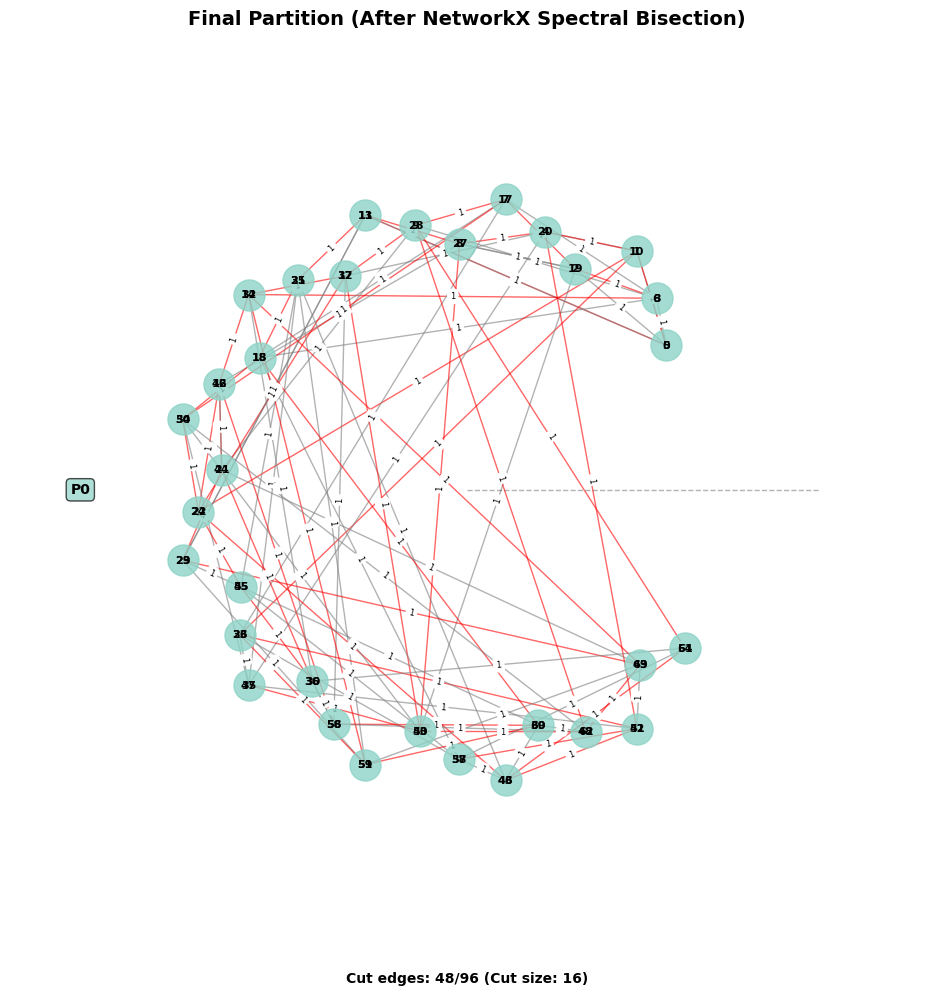

In [47]:
start = time.time()
G, comms = cut_nx_graph_max(test_graph, qpu_max=max(list(qpu_sizes.values())), func="spectral", seed=42)
end = time.time()
print(f"Graph partitioning completed in {end - start:.2f} seconds.")




assignment_SB = set_assignment_from_communities(test_graph, comms)

partition_counts = [len([n for n in assignment_SB if n == i]) for i in range(max(assignment_SB) + 1)]
print(f"\nPartition sizes from NetworkX spectral bisection: {partition_counts}")

print(len(comms), max(assignment_SB)+1)

draw_partitioned_graph(test_graph, max(assignment_SB), assignment_SB, "Final Partition (After NetworkX Spectral Bisection)")

In [48]:
cut_SB = calculate_cut_size(test_graph, assignment_SB)
print(f"\nCut size from NetworkX spectral bisection: {cut_SB}")


Cut size from NetworkX spectral bisection: 16
